Train on 125 samples, validate on 55 samples
Epoch 1/50
125/125 [==============================] - 1s 11ms/step - loss: 3.2842 - acc: 0.3840 - val_loss: 1.4456 - val_acc: 0.2000
Epoch 2/50
125/125 [==============================] - 0s 3ms/step - loss: 1.2429 - acc: 0.2640 - val_loss: 1.0519 - val_acc: 0.3455
Epoch 3/50
125/125 [==============================] - 0s 3ms/step - loss: 1.0332 - acc: 0.4240 - val_loss: 1.1249 - val_acc: 0.2000
Epoch 4/50
125/125 [==============================] - 0s 3ms/step - loss: 1.0313 - acc: 0.4960 - val_loss: 1.1493 - val_acc: 0.3455
Epoch 5/50
125/125 [==============================] - 0s 3ms/step - loss: 1.0188 - acc: 0.4160 - val_loss: 1.0088 - val_acc: 0.5818
Epoch 6/50
125/125 [==============================] - 0s 3ms/step - loss: 0.9747 - acc: 0.5040 - val_loss: 0.9572 - val_acc: 0.4364
Epoch 7/50
125/125 [==============================] - 0s 3ms/step - loss: 0.8809 - acc: 0.6160 - val_loss: 0.8723 - val_acc: 0.5273
Epoch 8/50
125/125 [==========

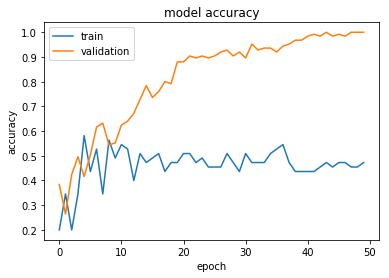

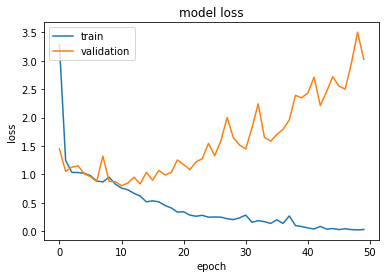

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle


# importing the libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from glob import glob
from keras.preprocessing.image import ImageDataGenerator
#from keras.applications.vgg16 import preprocess_input
#from keras.models import Sequential
#from keras.applications import VGG16 
#from keras.layers import Activation, Dense
import os


from keras.preprocessing.image import ImageDataGenerator

import keras 
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras.callbacks import TensorBoard
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from tensorflow.keras.callbacks import TensorBoard

import matplotlib.pyplot as plt
import time


NAME = "CNN-second-dataset-balance-15epochs-one-dropout-3cov2d-x200"

tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))




pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

# keras part .............

# Generate dummy data
#import numpy as np
#data = np.random.random((1000, 100))
#labels = np.random.randint(10, size=(1000, 1))

# Convert labels to categorical one-hot encoding
one_hot_labels = keras.utils.to_categorical(y, num_classes=3)

# Train the model, iterating on the data in batches of 32 samples
#model.fit(data, one_hot_labels, epochs=10, batch_size=32)

#end keras part...........


model = Sequential()

model.add(Conv2D(32, (3, 3), activation ='relu', input_shape=(200, 200, 3)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation ='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), strides = 1, activation ='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation ='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation ='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history=model.fit(X, one_hot_labels, batch_size=32, epochs=50, validation_split=0.3,callbacks=[tensorboard])
#model.evaluate_


#score,acc=model.evaluate(X)

print(history.history.keys())

plt.plot(history.history['val_acc'])
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

